# Here we will explore 2x2 covariance matrices

## Example of a single particle with no magnetic fields

We will first put it on site 1, and then evolve it for 1 tunneling time.

The tomography will be done without magnetic fields so current will be missing in the reconstructed state.

In [221]:
from gaussian_fermions import * #Can be installed with pip install gaussian_fermions

L = 2 #System length
N_shots = 0#1e6 #Whether to include Gaussian noise
N = 4 #Number of evolution times
T = L #Evolution time
beta = 3 #Inverse temperature

# (a) Create a thermal state
cov0 =  np.array([ [ 0, 0 ], [ 0, 1 ] ]) 
H_nnh = nearest_neighbor_hopping( L )
t = 1
cov_2x2 = H_nnh.cov_evolve( cov0, t )

# (b) Double up the lattice
cov_ini =  np.kron( cov_2x2, [ [ 0, 0 ], [ 0, 1 ] ] ) 

# (c) Quench to NN and evolve to equidistant times
H_quench = nearest_neighbor_hopping( 2 * L )
times = np.linspace( 0, T, N )

# (d) Measure local particle numbers
if N_shots != 0:
    sigma = 1. / np.sqrt( N_shots / N )
else:
    sigma = 0
    
data = [ H_quench.cov_evolve( cov_ini, t ).real.diagonal(0) + np.random.normal( 0, sigma, 2*L ) for t in times ]

## Run tomography
#
from hopping_tomography import * #Source: https://github.com/marekgluza/hopping_tomography

tomography = hopping_tomography( data, times, H_quench ) #Create an object using particle number data, times, and the model
tomography.recover_SDP( SDP_constraints = True, verbose = False ) #, eps = 1e-5, max_iters = 2500 )
#%matplotlib inline
#tomography.show_results( true_cov = cov_ini, fontsize=30, save_path = 'figs/app_2x2_notmagnetic.pdf' )


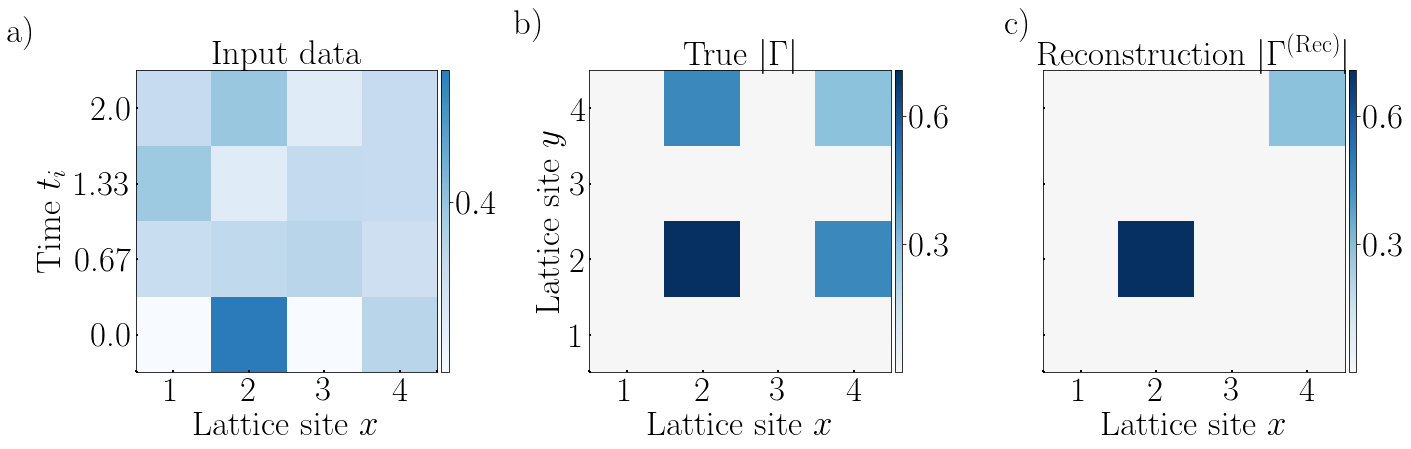

In [222]:
LL = 2*L
save_path = 'figs/app_2x2_notmagnetic.pdf'
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
fontsize=35
plt.rcParams['axes.labelsize'] = fontsize
plt.rcParams['axes.titlesize'] = fontsize
plt.rcParams['font.size'] = fontsize
#set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['legend.labelspacing'] = .3
plt.rcParams['legend.columnspacing']= .3
plt.rcParams['legend.handletextpad']= .1
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"

#Main plot
fig = plt.figure( figsize = ( 20,20 ) )


label_a_x = -1.7
label_a_y = 1.1*N
label_b_x = -1
label_b_y = LL+.5   
label_c_x = -.5
label_c_y = label_b_y

## a)
#Input data
ax_input_data = plt.subplot(1,3,1)#add_axes( [ data_pos_x, data_pos_y, data_width, data_height ] )   

im_input_data = ax_input_data.imshow( data, cmap='Blues', interpolation = None, 
                                     extent= [0, LL, N, 0])
plt.text( label_a_x,label_a_y, 'a)')

title = r'Input data'
plt.title( title )
plt.xlabel( 'Lattice site $x$' )
plt.ylabel( 'Time $t_i$' )
plt.clabel = r'$N_x(t)$'


plt.xlim((0,LL))
N = len( times )        
plt.ylim((0,N))

ticks = np.append(0,np.linspace(0.5,LL-.5,LL))
ticks = np.append(ticks, LL)
tick_labels = ['']*(len(ticks))
tick_labels[1] = 1
tick_labels[2] = 2
tick_labels[3] = 3
tick_labels[4] = LL
plt.xticks(np.array(ticks),tick_labels)

ticks = np.append(0,np.linspace(.5,N-.5,N))
np.append(ticks,N)
tick_labels = ['']*(len(ticks))
tick_labels[1] = times[0]
tick_labels[2] = round(times[1],2)
tick_labels[3] = round(times[2],2)
tick_labels[4] = times[3]

plt.yticks(np.array(ticks),tick_labels)

ax_input_data.tick_params(direction='in', length=2, width=2, colors='k')#,    grid_color='k', grid_alpha=0.5)

divider = make_axes_locatable(ax_input_data)
cax = divider.append_axes("right", size="2.5%", pad=0.05)        
cbar = plt.colorbar(im_input_data, cax=cax)
cbar.set_clim( 0, 1 )
cbar.set_ticks( [ round(range_plot-.1,1)/2,round(range_plot-.1,1)])

ax_input_data.set_aspect(1)

## b)
#Plot cov_ini

ax_cov_ini = plt.subplot(1,3,2) #add_axes( [ ini_pos_x, ini_pos_y, ini_width, ini_height ] )

im_cov_ini = ax_cov_ini.imshow( abs(cov_ini), cmap='RdBu', aspect='equal', interpolation = None, 
                               extent = [ 0, LL, LL, 0])
plt.text( label_b_x,label_b_y, 'b)')

title = r'True $|\Gamma|$'
plt.title( title )
plt.xlim((1,LL))
plt.ylim((1,LL))
plt.xlabel( 'Lattice site $x$' )
plt.ylabel( 'Lattice site $y$' )
ax_cov_ini.tick_params(direction='in', length=2, width=2, colors='k')
tick_labels = ['']*(len(ticks))
tick_labels[1] = 1
tick_labels[2] = 2
tick_labels[3] = 3
tick_labels[4] = LL

plt.xticks(np.array(ticks),tick_labels)
plt.yticks(np.array(ticks),tick_labels)

divider = make_axes_locatable(ax_cov_ini)
cax = divider.append_axes("right", size="2.5%", pad=0.05)
cbar = plt.colorbar(im_cov_ini, cax=cax)
range_plot = np.max( np.abs( cov_ini ) )
cbar.set_clim( -range_plot, range_plot )
cbar.set_ticks( [ round(range_plot-.1,1)/2,round(range_plot-.1,1)])

## c)
#Plot cov reconstructed + inset deviation
Gamma = tomography.Gamma
ax_cov_rec = plt.subplot(1,3,3)#add_axes( [ rec_pos_x, rec_pos_y, rec_width, rec_height ] )
cov_rec = abs(Gamma)
inset_cov = abs( cov_ini - Gamma )
im_cov_rec = ax_cov_rec.imshow( cov_rec, cmap='RdBu', aspect='equal', interpolation = None, extent = [ 0, LL, LL, 0])
plt.text( label_c_x,label_c_y, 'c)')

title = r'Reconstruction $|\Gamma^{\rm(Rec)}|$'
plt.title( title )
plt.xlim((1,LL))
plt.ylim((1,LL))
plt.xlabel( 'Lattice site $x$' )
plt.xticks(np.array(ticks),tick_labels)
no_labels = ['']*len(ticks)
plt.yticks(np.array(ticks),no_labels)
ax_cov_rec.tick_params(direction='in', length=2, width=2, colors='k')

divider = make_axes_locatable( ax_cov_rec )
cax_cov_rec = divider.append_axes("right", size="2.5%", pad=0.05)

cbar = plt.colorbar( im_cov_rec, cax = cax_cov_rec )
range_plot = np.max( np.abs( cov_rec ) )
cbar.set_clim( -range_plot, range_plot )
cbar.set_ticks( [ round(range_plot-.1,1)/2,round(range_plot-.1,1)])
fig.tight_layout()

if save_path is None:
    save_path = "tomography_run"
plt.savefig( save_path, format='pdf')
plt.show()


##### Some quick checks about magnetic fields for the appendix 

The couplings are real so complex conjugation inverts the propagator

In [49]:
np.linalg.norm( H_quench.G(1) - H_quench.G(-1).conj())

0.0

and it's symmetric

In [50]:
np.linalg.norm( H_quench.G(1) - H_quench.G(1).T)

1.798766884999431e-16

Quick verification of the relation $\Gamma^{(Im)}(t)=-\Gamma^{(Im)}(-t)^T$ on a particular example

In [45]:
X = H_quench.cov_evolve(cov_ini.imag,1)
X2 = H_quench.cov_evolve(cov_ini.imag,-1)
np.linalg.norm(X+X2.T)

1.850775600978952e-17

The same for $\Gamma^{(Im)}(t)^*=\Gamma^{(Im)}(-t)$

In [48]:
X = H_quench.cov_evolve(cov_ini.imag,1)
X2 = H_quench.cov_evolve(cov_ini.imag,-1)
np.linalg.norm(X-X2.conj())

0.0

## Example of a reconstruction with magnetic fields present

In [207]:
from gaussian_fermions import * #Can be installed with pip install gaussian_fermions

L = 2 #System length
N_shots = 0#1e6 #Whether to include Gaussian noise
N = 4 #Number of evolution times
T = L #Evolution time
beta = 3 #Inverse temperature

# (a) Create a thermal state
cov0 =  np.array([ [ 0, 0 ], [ 0, 1 ] ]) 
H_nnh = nearest_neighbor_hopping( L )
t=1
cov_2x2 = H_nnh.cov_evolve( cov0, t )

# (b) Double up the lattice
cov_ini =  np.kron( cov_2x2, [ [ 0, 0 ], [ 0, 1 ] ] ) 

# (c) Quench to NN and evolve to equidistant times
H_quench = nearest_neighbor_hopping( 2 * L )
H_quench.h = H_quench.h + np.diag([1j]*(2*L-1),1) - np.diag([1j]*(2*L-1),-1) #Adding magnetic fields
times = np.linspace( 0, T, N )

# (d) Measure local particle numbers
if N_shots != 0:
    sigma = 1. / np.sqrt( N_shots / N )
else:
    sigma = 0
    
data = [ H_quench.cov_evolve( cov_ini, t ).real.diagonal(0) + np.random.normal( 0, sigma, 2*L ) for t in times ]

## Run tomography
#
from hopping_tomography import * #Source: https://github.com/marekgluza/hopping_tomography

tomography = hopping_tomography( data, times, H_quench ) #Create an object using particle number data, times, and the model
tomography.recover_SDP( SDP_constraints = True, verbose = False ) #, eps = 1e-5, max_iters = 2500 )
#%matplotlib inline
#tomography.show_results( true_cov = cov_ini, fontsize=30, save_path = 'figs/app_2x2_magnetic.pdf')

The couplings should be hermitian $h=h^\dagger$

In [212]:
np.linalg.norm(H_quench.h - H_quench.h.T.conj())

0.0

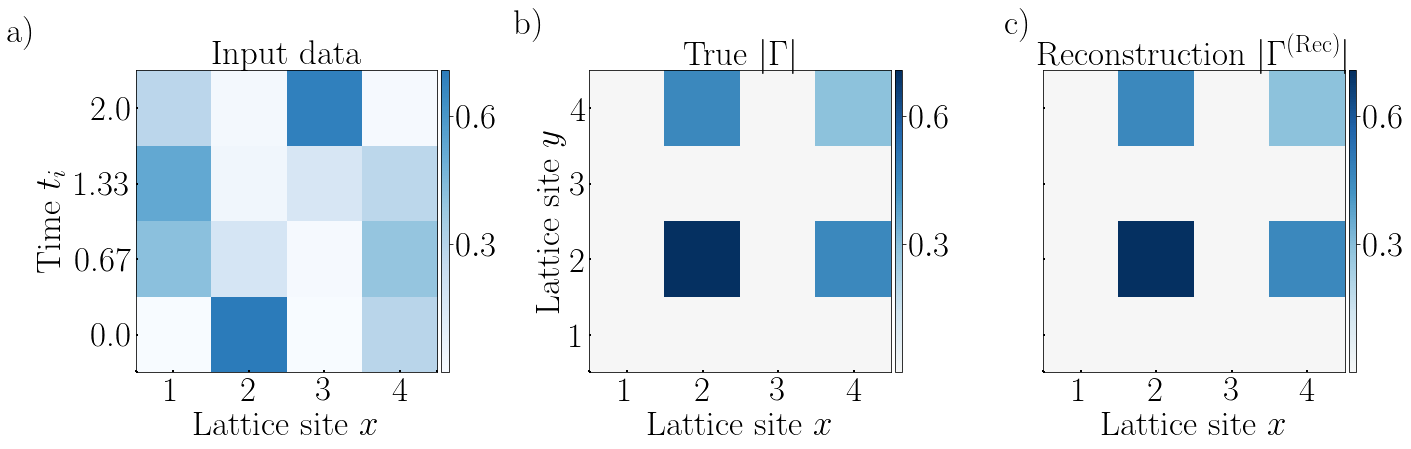

In [213]:
LL = 2*L
save_path = 'figs/app_2x2_magnetic.pdf'
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
fontsize=35
plt.rcParams['axes.labelsize'] = fontsize
plt.rcParams['axes.titlesize'] = fontsize
plt.rcParams['font.size'] = fontsize
#set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['legend.labelspacing'] = .3
plt.rcParams['legend.columnspacing']= .3
plt.rcParams['legend.handletextpad']= .1
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"

#Main plot
fig = plt.figure( figsize = ( 20,20 ) )


label_a_x = -1.7
label_a_y = 1.1*N
label_b_x = -1
label_b_y = LL+.5   
label_c_x = -.5
label_c_y = label_b_y

## a)
#Input data
ax_input_data = plt.subplot(1,3,1)#add_axes( [ data_pos_x, data_pos_y, data_width, data_height ] )   

im_input_data = ax_input_data.imshow( data, cmap='Blues', interpolation = None, 
                                     extent= [0, LL, N, 0])
plt.text( label_a_x,label_a_y, 'a)')

title = r'Input data'
plt.title( title )
plt.xlabel( 'Lattice site $x$' )
plt.ylabel( 'Time $t_i$' )
plt.clabel = r'$N_x(t)$'


plt.xlim((0,LL))
N = len( times )        
plt.ylim((0,N))

ticks = np.append(0,np.linspace(0.5,LL-.5,LL))
ticks = np.append(ticks, LL)
tick_labels = ['']*(len(ticks))
tick_labels[1] = 1
tick_labels[2] = 2
tick_labels[3] = 3
tick_labels[4] = LL
plt.xticks(np.array(ticks),tick_labels)

ticks = np.append(0,np.linspace(.5,N-.5,N))
np.append(ticks,N)
tick_labels = ['']*(len(ticks))
tick_labels[1] = times[0]
tick_labels[2] = round(times[1],2)
tick_labels[3] = round(times[2],2)
tick_labels[4] = times[3]

plt.yticks(np.array(ticks),tick_labels)

ax_input_data.tick_params(direction='in', length=2, width=2, colors='k')#,    grid_color='k', grid_alpha=0.5)

divider = make_axes_locatable(ax_input_data)
cax = divider.append_axes("right", size="2.5%", pad=0.05)        
cbar = plt.colorbar(im_input_data, cax=cax)
cbar.set_clim( 0, 1 )
cbar.set_ticks( [ round(range_plot-.1,1)/2,round(range_plot-.1,1)])

ax_input_data.set_aspect(1)

## b)
#Plot cov_ini

ax_cov_ini = plt.subplot(1,3,2) #add_axes( [ ini_pos_x, ini_pos_y, ini_width, ini_height ] )

im_cov_ini = ax_cov_ini.imshow( abs(cov_ini), cmap='RdBu', aspect='equal', interpolation = None, 
                               extent = [ 0, LL, LL, 0])
plt.text( label_b_x,label_b_y, 'b)')

title = r'True $|\Gamma|$'
plt.title( title )
plt.xlim((1,LL))
plt.ylim((1,LL))
plt.xlabel( 'Lattice site $x$' )
plt.ylabel( 'Lattice site $y$' )
ax_cov_ini.tick_params(direction='in', length=2, width=2, colors='k')
tick_labels = ['']*(len(ticks))
tick_labels[1] = 1
tick_labels[2] = 2
tick_labels[3] = 3
tick_labels[4] = LL

plt.xticks(np.array(ticks),tick_labels)
plt.yticks(np.array(ticks),tick_labels)

divider = make_axes_locatable(ax_cov_ini)
cax = divider.append_axes("right", size="2.5%", pad=0.05)
cbar = plt.colorbar(im_cov_ini, cax=cax)
range_plot = np.max( np.abs( cov_ini ) )
cbar.set_clim( -range_plot, range_plot )
cbar.set_ticks( [ round(range_plot-.1,1)/2,round(range_plot-.1,1)])

## c)
#Plot cov reconstructed + inset deviation
Gamma = tomography.Gamma
ax_cov_rec = plt.subplot(1,3,3)#add_axes( [ rec_pos_x, rec_pos_y, rec_width, rec_height ] )
cov_rec = abs(Gamma)
inset_cov = abs( cov_ini - Gamma )
im_cov_rec = ax_cov_rec.imshow( cov_rec, cmap='RdBu', aspect='equal', interpolation = None, extent = [ 0, LL, LL, 0])
plt.text( label_c_x,label_c_y, 'c)')

title = r'Reconstruction $|\Gamma^{\rm(Rec)}|$'
plt.title( title )
plt.xlim((1,LL))
plt.ylim((1,LL))
plt.xlabel( 'Lattice site $x$' )
plt.xticks(np.array(ticks),tick_labels)
no_labels = ['']*len(ticks)
plt.yticks(np.array(ticks),no_labels)
ax_cov_rec.tick_params(direction='in', length=2, width=2, colors='k')

divider = make_axes_locatable( ax_cov_rec )
cax_cov_rec = divider.append_axes("right", size="2.5%", pad=0.05)

cbar = plt.colorbar( im_cov_rec, cax = cax_cov_rec )
range_plot = np.max( np.abs( cov_rec ) )
cbar.set_clim( -range_plot, range_plot )
cbar.set_ticks( [ round(range_plot-.1,1)/2,round(range_plot-.1,1)])
fig.tight_layout()

if save_path is None:
    save_path = "tomography_run"
plt.savefig( save_path, format='pdf')
plt.show()


##### Again some quick checks
The couplings are not real so complex conjugation does not invert the propagator

In [209]:
np.linalg.norm( H_quench.G(1) - H_quench.G(-1).conj())

3.166231810418886

and it's not symmetric

In [63]:
np.linalg.norm( H_quench.G(1) - H_quench.G(1).T)

3.166231810418886

Quick verification of the relation $\Gamma^{(Im)}(t) \neq-\Gamma^{(Im)}(-t)^T$ on a particular example where magnetic fields are present

In [64]:
X = H_quench.cov_evolve(cov_ini.imag,1)
X2 = H_quench.cov_evolve(cov_ini.imag,-1)
np.linalg.norm(X+X2.T)

0.972343949827794

The same for $\Gamma^{(Im)}(t)^*\neq\Gamma^{(Im)}(-t)$ due to magnetic fields

In [65]:
X = H_quench.cov_evolve(cov_ini.imag,1)
X2 = H_quench.cov_evolve(cov_ini.imag,-1)
np.linalg.norm(X-X2.conj())

0.972343949827794

# Large reconstructions

In [1]:
from gaussian_fermions import * #Can be installed with pip install gaussian_fermions

L = 20 #System length
N_shots = 0 #Whether to include Gaussian noise
N = 15 #Number of evolution times
T = 15 #Evolution time
beta = 3 #Inverse temperature

# (a) Create a thermal state
H_nnh = nearest_neighbor_hopping( L )
cov_thermal = H_nnh.cov_thermal( beta )

# (b) Double up the lattice
cov_0 = np.diag( [0,1]*int(L/2))
cov_0 = H_nnh.cov_evolve(cov_0, 1)
cov_ini =  np.kron( cov_0, [ [ 0, 0 ], [ 0, 1 ] ] ) 

# (c) Quench to NN and evolve to equidistant times
H_quench = nearest_neighbor_hopping( 2 * L )
times = np.linspace( 0, T, N )

# (d) Measure local particle numbers
if N_shots != 0:
    sigma = 1. / np.sqrt( N_shots / N )
else:
    sigma = 0
    
data = [ H_quench.cov_evolve( cov_ini, t ).real.diagonal(0) + np.random.normal( 0, sigma, 2*L ) for t in times ]

## Run tomography
#
from hopping_tomography import * #Source: https://github.com/marekgluza/hopping_tomography

tomography = hopping_tomography( data, times, H_quench ) #Create an object using particle number data, times, and the model
tomography.recover_SDP( SDP_constraints = True, verbose = True ) #, eps = 1e-5, max_iters = 2500 )


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 1806015
eps = 1.00e-05, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 3815, constraints m = 8895
Cones:	soc vars: 2415, soc blks: 615
	sd vars: 6480, sd blks: 2
Setup time: 3.89e+00s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 4.92e+20  4.19e+20  9.84e-01 -7.62e+21 -6.27e+19  5.63e+21  1.77e-01 
   100| 8.62e-05  7.20e-05  7.25e-05 -1.31e-05 -8.57e-05  1.33e-16  4.81e+00 
   200| 3.21e-05  2.01e-05  9.74e-06 -1.38e-07 -9.88e-06  2.15e-16  8.21e+00 
  

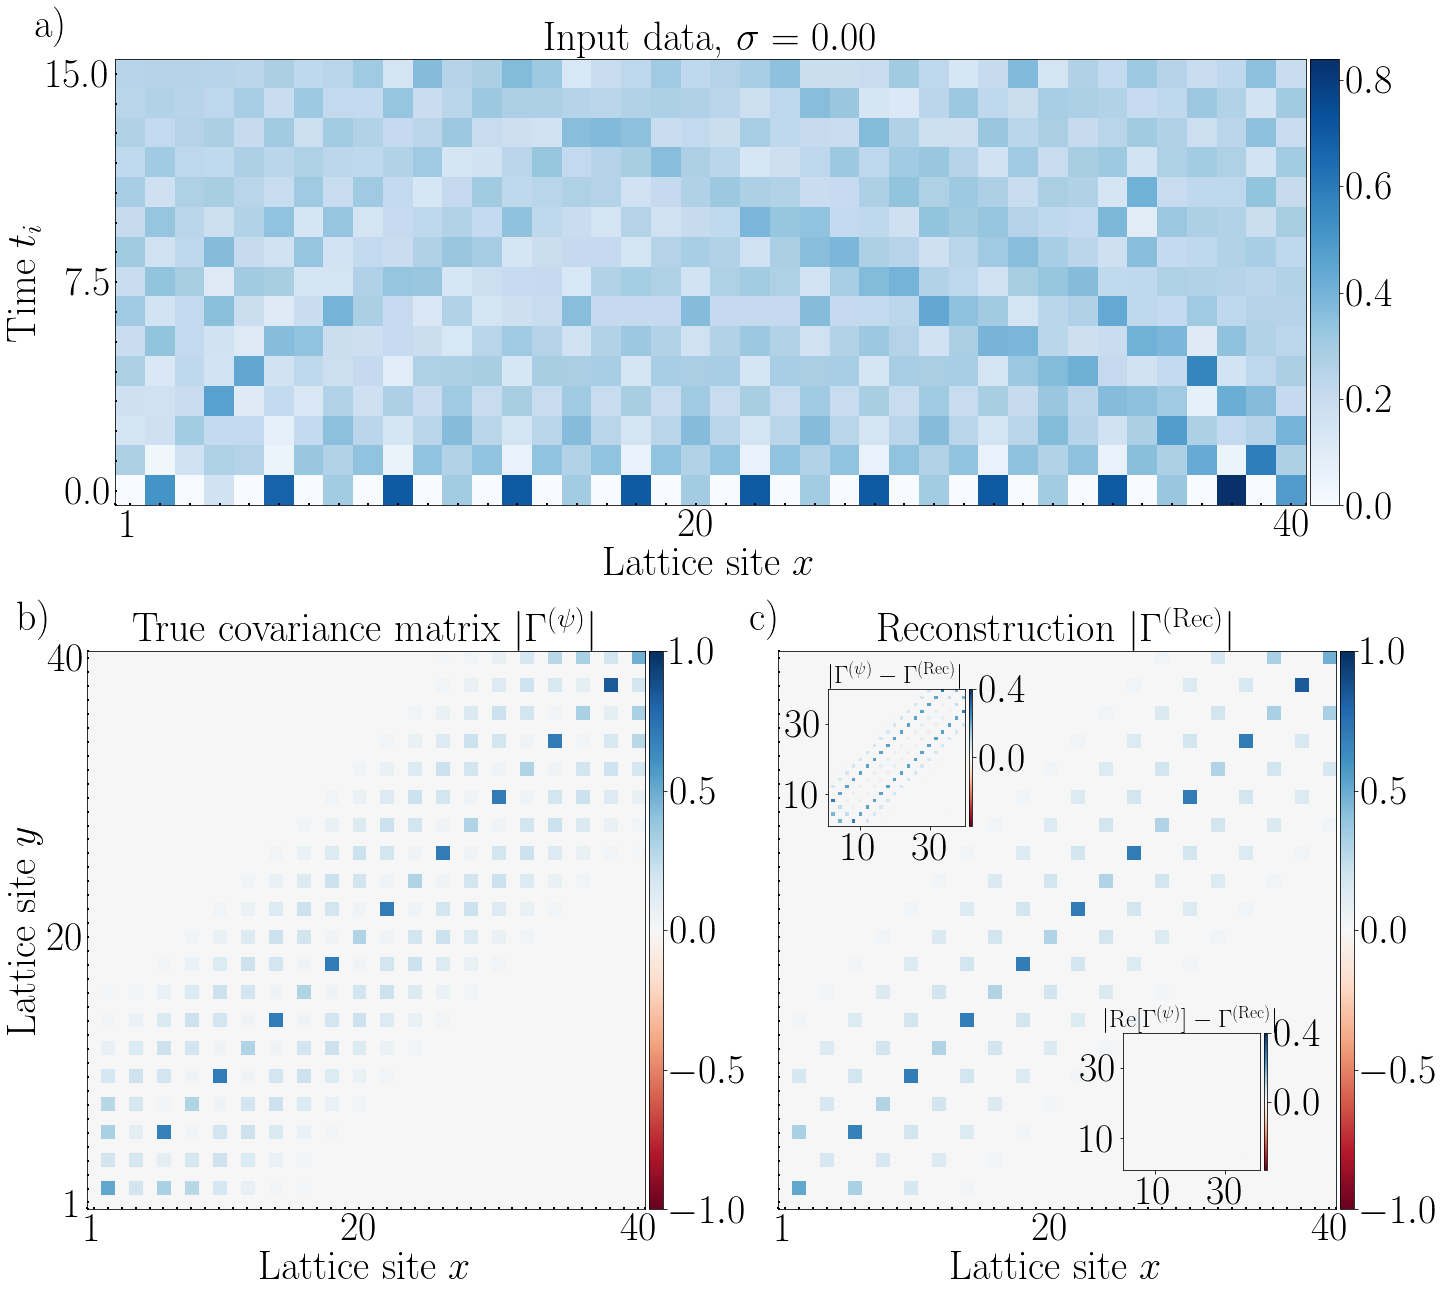

In [11]:
LL=tomography.LL
save_path = 'figs/tomography_app_L_'+str(L)+'_T_'+str(T)+'_N_'+str(N)+'_sigma_'+str( int( np.ceil(sigma) ) )+'.pdf'

fontsize = 40
plt.rcParams['axes.labelsize'] = fontsize
plt.rcParams['axes.titlesize'] = fontsize
plt.rcParams['font.size'] = fontsize
#set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['legend.labelspacing'] = .3
plt.rcParams['legend.columnspacing']= .3
plt.rcParams['legend.handletextpad']= .1
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
#Main plot
fig = plt.figure( figsize = ( 20,20 ) )

data_pos_x  = 0.08
data_pos_y = .55
data_height = 0.4
data_width = 0.85

ini_pos_x  = 0.06
ini_pos_y = .1
ini_height = 0.4
ini_width = ini_height

rec_pos_x  = 0.54
rec_pos_y = .1
rec_height = 0.4
rec_width = rec_height

inset_pos_x = 0.575
inset_pos_y = 0.37   
inset_height = 0.1
inset_width = 0.1

label_a_x = -2.7
label_a_y = 1.05*N
label_b_x = -5
label_b_y = LL+1.5   
label_c_x = -2
label_c_y = label_b_y

## a)
#Input data
ax_input_data = fig.add_axes( [ data_pos_x, data_pos_y, data_width, data_height ] )   

im_input_data = ax_input_data.imshow( data, cmap='Blues', aspect = 'auto', interpolation = None, 
                                     extent= [0, LL, N, 0])
plt.text( label_a_x,label_a_y, 'a)')

title = r'Input data, $\sigma = %0.2f$' % sigma
plt.title( title )
plt.xlabel( 'Lattice site $x$' )
plt.ylabel( 'Time $t_i$' )
plt.clabel = r'$N_x(t)$'

#plt.grid() 

plt.xlim((0,LL))
N = len( times )        
plt.ylim((0,N))

ticks = np.append(0,np.linspace(0.5,LL-.5,LL))
ticks = np.append(ticks, LL)
tick_labels = ['']*(len(ticks))
tick_labels[1] = 1
tick_labels[int(LL/2)] = int(LL/2)
tick_labels[-2] = LL
plt.xticks(np.array(ticks),tick_labels)

ticks = np.append(0,np.linspace(.5,N-.5,N))
np.append(ticks,N)
tick_labels = ['']*(len(ticks))
tick_labels[1] = times[0]
tick_labels[int(N/2)+1] = round(times[int(N/2)],1)
tick_labels[-1] = times[-1]
plt.yticks(np.array(ticks),tick_labels)

ax_input_data.tick_params(direction='in', length=2, width=2, colors='k')#,    grid_color='k', grid_alpha=0.5)

divider = make_axes_locatable(ax_input_data)
cax = divider.append_axes("right", size="2.5%", pad=0.05)        
cbar = plt.colorbar(im_input_data, cax=cax)
#cbar.set_clim( 0, 1 )
ax_input_data.set_aspect(1)

## b)
#Plot cov_ini
ax_cov_ini = fig.add_axes( [ ini_pos_x, ini_pos_y, ini_width, ini_height ] )

im_cov_ini = ax_cov_ini.imshow( abs(cov_ini), cmap='RdBu', aspect='equal', interpolation = None, 
                               extent = [ 0, LL, LL, 0],vmin=-1,vmax=1)
plt.text( label_b_x,label_b_y, 'b)')

title = r'True covariance matrix $|\Gamma^{(\psi)}|$'
plt.title( title )
plt.xlim((1,LL))
plt.ylim((1,LL))
plt.xlabel( 'Lattice site $x$' )
plt.ylabel( 'Lattice site $y$' )
#plt.grid()
ticks = np.append(0,np.linspace(0.5,LL-.5,LL))
ticks = np.append(ticks,LL)
tick_labels = ['']*(len(ticks))
tick_labels[1] = 1
tick_labels[int(LL/2)] = int(LL/2)
tick_labels[-2] = LL

plt.xticks(np.array(ticks),tick_labels)
plt.yticks(np.array(ticks),tick_labels)
ax_cov_ini.tick_params(direction='in', length=2, width=2, colors='k')
divider = make_axes_locatable(ax_cov_ini)
cax = divider.append_axes("right", size="2.5%", pad=0.05)

cbar = plt.colorbar(im_cov_ini, cax=cax)
range_plot = np.max( np.abs( cov_ini ) )
#cbar.set_clim( -range_plot, range_plot )

## c)
#Plot cov reconstructed + inset deviation

ax_cov_rec = fig.add_axes( [ rec_pos_x, rec_pos_y, rec_width, rec_height ] )

cov_rec = abs(tomography.Gamma)
inset_cov = abs( cov_ini - tomography.Gamma )
inset_cov2 = abs( cov_ini.real - tomography.Gamma )

im_cov_rec = ax_cov_rec.imshow( cov_rec, cmap='RdBu', aspect='equal', interpolation = None, 
                               extent = [ 0, LL, LL, 0],vmin=-1,vmax=1)
plt.text( label_c_x,label_c_y, 'c)')



title = r'Reconstruction $|\Gamma^{\rm(Rec)}|$'
plt.title( title )
#plt.grid()
plt.xlim((1,LL))
plt.ylim((1,LL))
plt.xlabel( 'Lattice site $x$' )
plt.xticks(np.array(ticks),tick_labels)
plt.yticks(ticks,[])
ax_cov_rec.tick_params(direction='in', length=2, width=2, colors='k')

divider = make_axes_locatable( ax_cov_rec )
cax_cov_rec = divider.append_axes("right", size="2.5%", pad=0.05)

cbar = plt.colorbar( im_cov_rec, cax = cax_cov_rec )
range_plot = np.max( np.abs( cov_rec ) )
#cbar.set_clim( -range_plot, range_plot )

#inset 
inset = fig.add_axes( [ inset_pos_x, inset_pos_y, inset_width, inset_height ] )
im2 = inset.imshow( inset_cov, extent = [ 1, LL, LL, 1], cmap='RdBu', 
                   aspect='equal', interpolation = None,vmin=-.4,vmax=.4)
plt.xlim((1,LL))
plt.ylim((1,LL))
ticks = [int(LL/4),int(3*LL/4)]
plt.xticks( ticks, ticks )
plt.yticks( ticks, ticks )
plt.title( r'$|\Gamma^{(\psi)}-\Gamma^{(\rm Rec)}|$',fontsize = 25)
divider2 = make_axes_locatable(inset)
cax_cov_rec2 = divider2.append_axes("right", size="2.5%", pad=0.05)
cbar2 = plt.colorbar(im2, cax = cax_cov_rec2 )
range_plot = np.max( np.abs( inset_cov ) )
#cbar2.set_clim( -range_plot, range_plot )
cbar2.set_ticks( [ 0,.4])

inset_pos_x2 = 0.78
inset_pos_y2 = 0.131   

#inset 2
inset2 = fig.add_axes( [ inset_pos_x2, inset_pos_y2, inset_width, inset_height ] )
im3 = inset2.imshow( inset_cov2, extent = [ 1, LL, LL, 1], cmap='RdBu',
                    aspect='equal', interpolation = None,vmin=-.4,vmax=.4)
plt.xlim((1,LL))
plt.ylim((1,LL))
ticks = [int(LL/4),int(3*LL/4)]
plt.xticks( ticks, ticks )
plt.yticks( ticks, ticks )
plt.title( r'$|\rm{Re}[\Gamma^{(\psi)}]-\Gamma^{(\rm Rec)}|$',fontsize = 25)
divider3 = make_axes_locatable(inset2)
cax_cov_rec3 = divider3.append_axes("right", size="2.5%", pad=0.05)
cbar3 = plt.colorbar(im3, cax = cax_cov_rec3 )
range_plot = np.max( np.abs( inset_cov2 ) )
#cbar3.set_clim( -range_plot, range_plot )
cbar3.set_ticks( [ 0,0.4])

plt.savefig( save_path, format='pdf')
plt.show()


### Generic 2 mode covariance matrices with a single particle

Observe that a 2x2 covariance matrix can be written as
$$ \Gamma = \eta 1 + \vec\alpha \cdot \vec\sigma $$
and then the eigenvalues read
$$ \lambda_\pm(\Gamma) = \eta \pm \|\vec\alpha\|_2 $$
We thus can put $\eta=\alpha_z$ and find that the spectrum is $\lambda(\Gamma) = (0,1)$ i.e. we have a pure state describing a single particle being present in the system but possible delecolazed over the 2 sites.


In [24]:
from gaussian_fermions import * #Can be installed with pip install gaussian_fermions

L = 2 #System length
N_shots = 0#1e6 #Whether to include Gaussian noise
N = 2*L #Number of evolution times
T = L #Evolution time
beta = 3 #Inverse temperature

# (a) Create a thermal state

eta = .5
alpha = [eta, 0.3,0.2]
alpha = alpha / np.linalg.norm( alpha ) * eta
cov_2x2 = eta * np.eye(2) + alpha[0] * np.array([ [ 1, 0 ], [ 0, -1 ] ]) +\
                 alpha[1] * np.array([ [ 0, 1 ], [ 1, 0 ] ]) + alpha[2] * np.array([ [ 0, -1j ], [ 1j, 0 ] ]) 
n, R = np.linalg.eigh( cov_2x2 )

print( n )

# (b) Double up the lattice
cov_ini =  np.kron( cov_2x2, [ [ 0, 0 ], [ 0, 1 ] ] ) 

# (c) Quench to NN and evolve to equidistant times
H_quench = nearest_neighbor_hopping( 2 * L )
times = np.linspace( 0, T, N )

# (d) Measure local particle numbers
if N_shots != 0:
    sigma = 1. / np.sqrt( N_shots / N )
else:
    sigma = 0
    
data = [ H_quench.cov_evolve( cov_ini, t ).real.diagonal(0) + np.random.normal( 0, sigma, 2*L ) for t in times ]

## Run tomography
#
from hopping_tomography import * #Source: https://github.com/marekgluza/hopping_tomography

tomography = hopping_tomography( data, times, H_quench ) #Create an object using particle number data, times, and the model
tomography.recover_SDP( SDP_constraints = True, verbose = False ) #, eps = 1e-5, max_iters = 2500 )
%matplotlib
tomography.show_results( true_cov = cov_ini, fontsize = 30 )

[-6.9388939e-17  1.0000000e+00]
Using matplotlib backend: TkAgg


In [25]:
tomography.Gamma

array([[ 3.79172720e-09+2.64088941e-33j,  1.20005556e-17-3.36464651e-08j,
        -2.59096883e-09+3.72718732e-18j,  5.06900856e-18+4.04476650e-08j],
       [ 1.20005556e-17+3.36467548e-08j,  9.05553550e-01-1.23435518e-35j,
        -3.27976398e-17+1.30398538e-08j,  2.43332148e-01+5.66157906e-17j],
       [-2.59100014e-09-3.72718732e-18j, -3.27976398e-17-1.30398887e-08j,
         4.31832587e-08+2.62203916e-34j, -1.65115089e-17-3.21238136e-08j],
       [ 5.06900856e-18-4.04476080e-08j,  2.43332148e-01-5.66157906e-17j,
        -1.65115089e-17+3.21237149e-08j,  9.44464688e-02+4.69033190e-35j]])

In [26]:
cov_ini

array([[0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.90555355+0.j        ,
        0.        +0.j        , 0.24333213-0.16222142j],
       [0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.24333213+0.16222142j,
        0.        +0.j        , 0.09444645+0.j        ]])

The couplings are real so complex conjugation inverts the propagator

In [49]:
np.linalg.norm( H_quench.G(1) - H_quench.G(-1).conj())

0.0

and it's symmetric

In [50]:
np.linalg.norm( H_quench.G(1) - H_quench.G(1).T)

1.798766884999431e-16

Quick verification of the relation $\Gamma^{(Im)}(t)=-\Gamma^{(Im)}(-t)^T$ on a particular example

In [45]:
X = H_quench.cov_evolve(cov_ini.imag,1)
X2 = H_quench.cov_evolve(cov_ini.imag,-1)
np.linalg.norm(X+X2.T)

1.850775600978952e-17

The same for $\Gamma^{(Im)}(t)^*=\Gamma^{(Im)}(-t)$

In [48]:
X = H_quench.cov_evolve(cov_ini.imag,1)
X2 = H_quench.cov_evolve(cov_ini.imag,-1)
np.linalg.norm(X-X2.conj())

0.0